<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


Valores faltantes por columna:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Resumen estadístico:


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



Distribución de la variable objetivo (diagnosis):


,count
diagnosis,
0,357
1,212


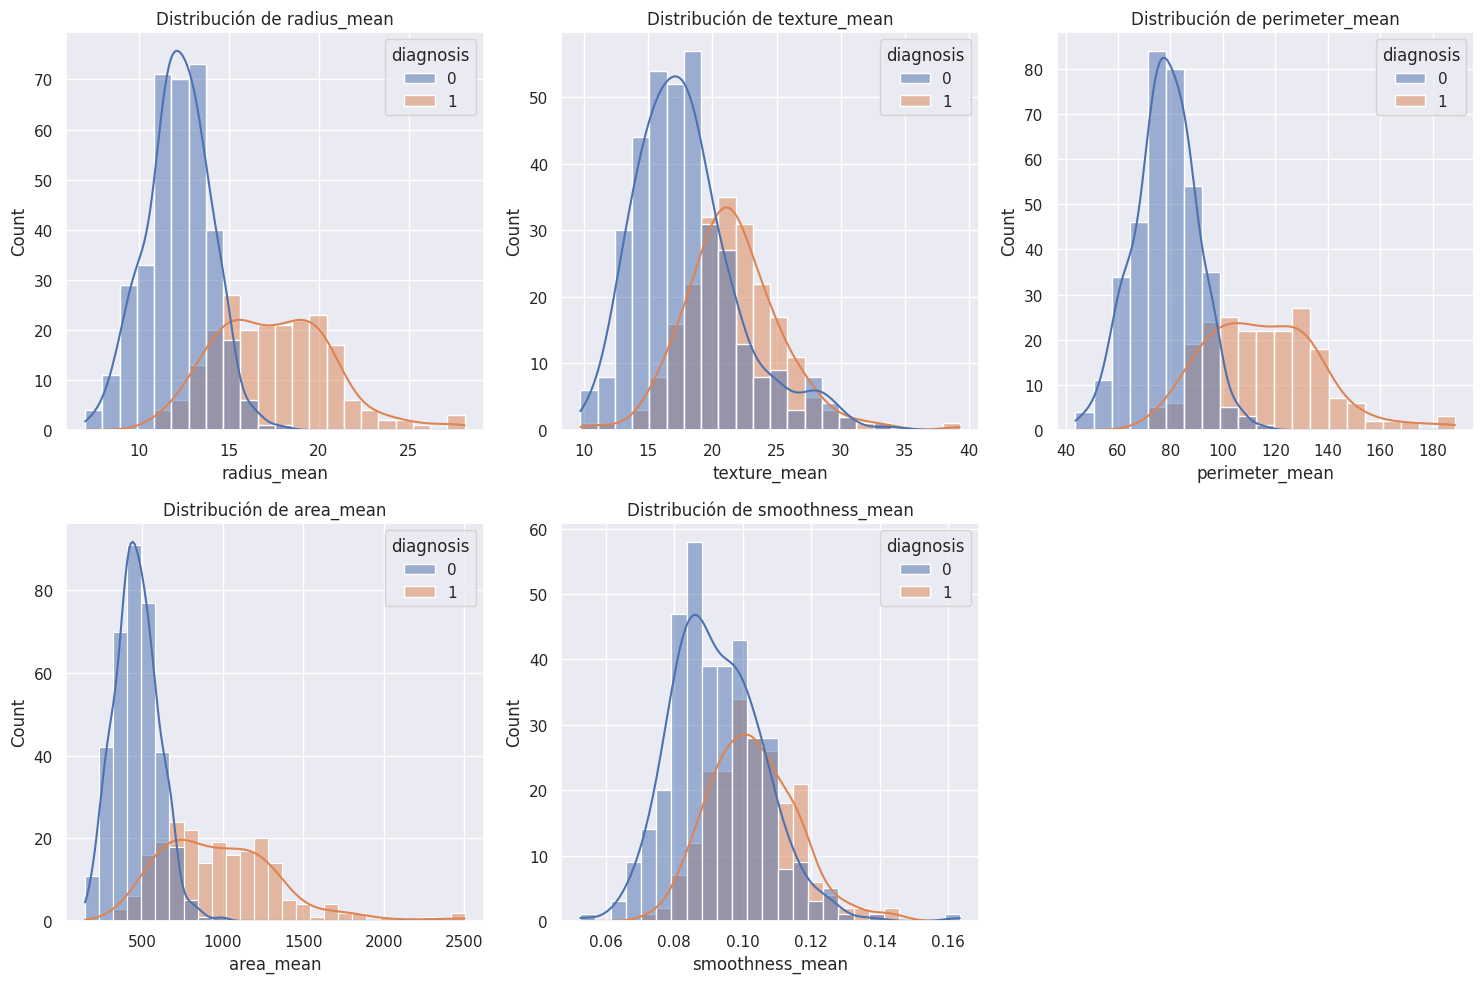


Matriz de correlación:


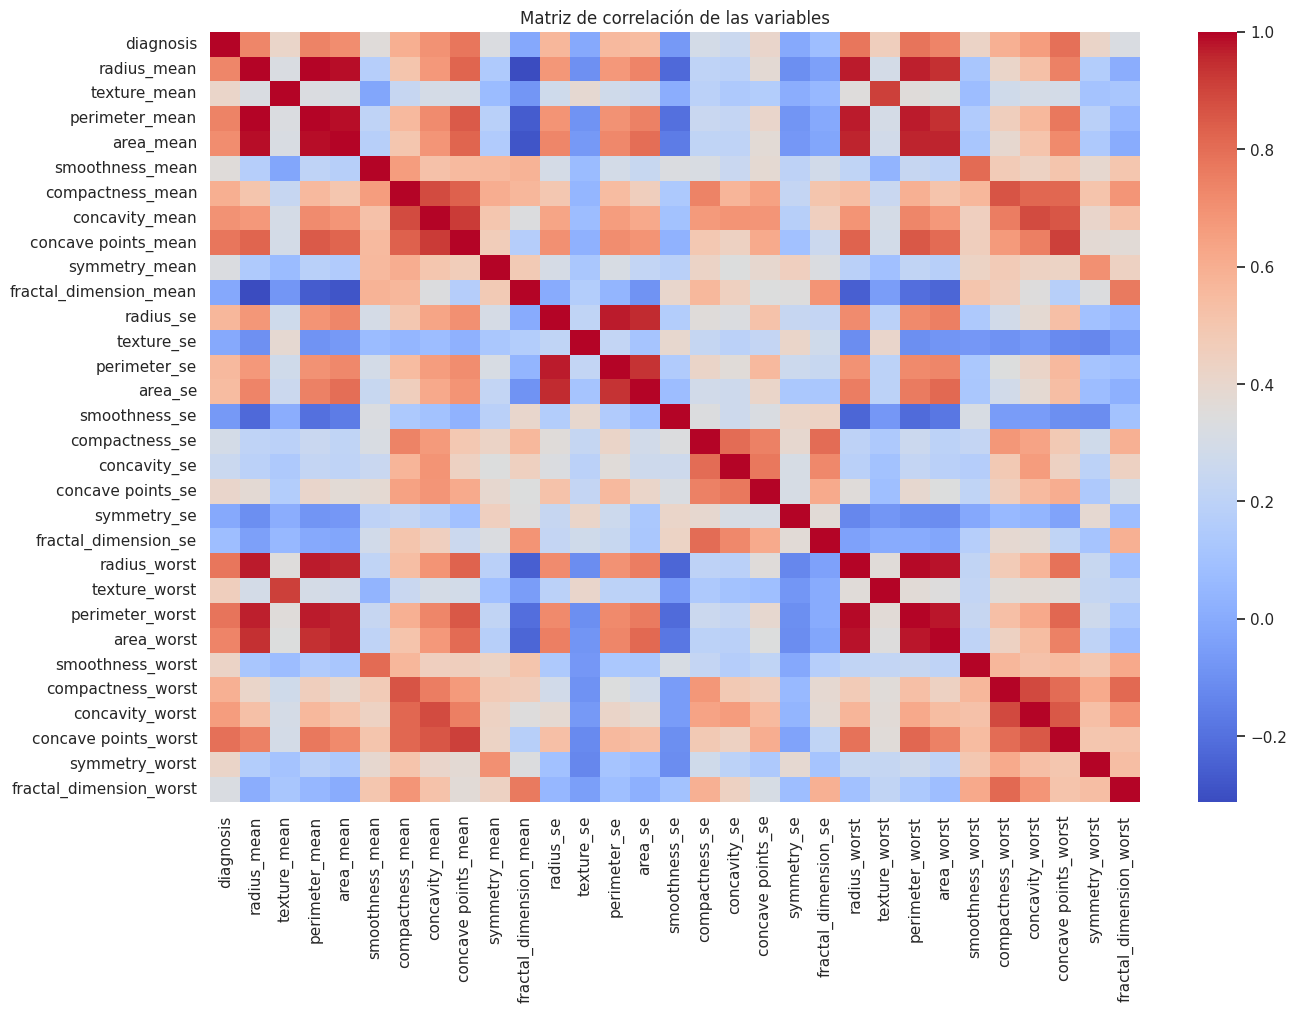

In [2]:
# 1. Análisis exploratorio profundo (EDA)

# Verificar valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Resumen estadístico de las variables
print("\nResumen estadístico:")
display(df.describe())

# Distribución de la variable objetivo
print("\nDistribución de la variable objetivo (diagnosis):")
display(df['diagnosis'].value_counts())

# Visualización de la distribución de algunas variables
# Seleccionamos algunas variables representativas para visualizar su distribución
variables_a_visualizar = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_a_visualizar):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=var, kde=True, hue='diagnosis')
    plt.title(f'Distribución de {var}')
plt.tight_layout()
plt.show()

# Análisis de correlación
print("\nMatriz de correlación:")
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de correlación de las variables')
plt.show()

**Variables Discriminativas Clave (EDA):**

Basado en el análisis exploratorio, las variables que muestran mayor capacidad para diferenciar entre tumores benignos y malignos son aquellas relacionadas con el tamaño y la morfología de los núcleos celulares, como el radio, perímetro y área (tanto promedio como en su "peor" caso). La alta correlación de estas características con la variable objetivo (`diagnosis`) y la clara separación de sus distribuciones en los gráficos así lo sugieren.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [3]:
# 2. Preprocesamiento de datos

# Separar características (X) y variable objetivo (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Normalización de variables numéricas
# Utilizamos StandardScaler para centrar los datos en 0 con una desviación estándar de 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de nuevo a DataFrame para facilitar el análisis
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Datos después de la normalización:")
display(X_scaled.head())

# Estrategia adicional de preprocesamiento: Eliminación de multicolinealidad
# Observamos en el mapa de correlación que hay variables altamente correlacionadas.
# Una estrategia podría ser eliminar una de las variables de cada par altamente correlacionado
# para reducir la redundancia y potencialmente mejorar el rendimiento de algunos modelos.

# Calculamos la matriz de correlación de las características
corr_matrix = X_scaled.corr().abs()

# Seleccionamos las columnas superiores de la matriz triangular
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar las columnas con correlación mayor a un umbral (ej. 0.95)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"\nVariables identificadas para posible eliminación por alta multicolinealidad (>0.95): {to_drop}")

# Para este laboratorio, no eliminaremos las variables automáticamente,
# pero es una estrategia a considerar. Podríamos, por ejemplo, elegir
# mantener solo una de las variables de cada par altamente correlacionado
# basándonos en su correlación individual con la variable objetivo o en el conocimiento del dominio.

# Otra estrategia a considerar es la selección de características basada en importancia
# del modelo o pruebas estadísticas.

# Para este laboratorio, continuaremos con los datos escalados (X_scaled)
# y exploraremos la reducción de dimensionalidad con PCA en el siguiente paso.

Datos después de la normalización:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100



Variables identificadas para posible eliminación por alta multicolinealidad (>0.95): ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']



3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


Varianza explicada por cada componente principal:
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]

Varianza acumulada explicada:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


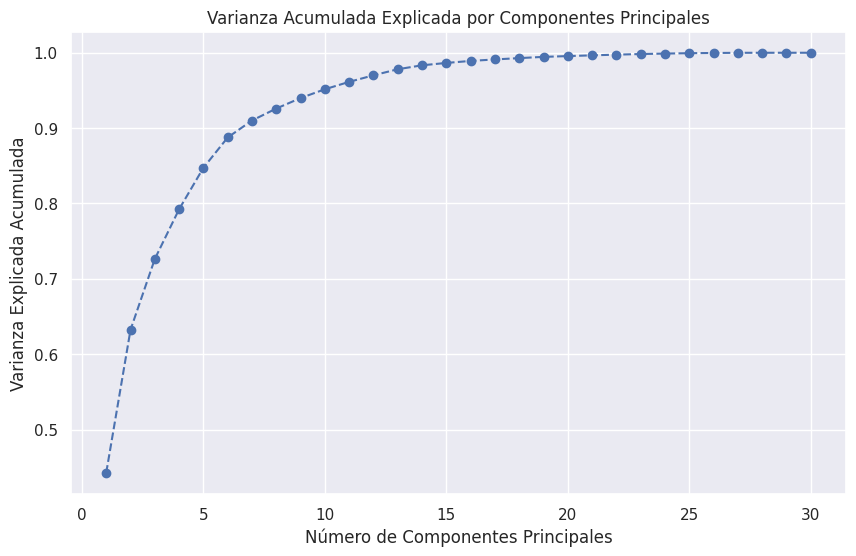

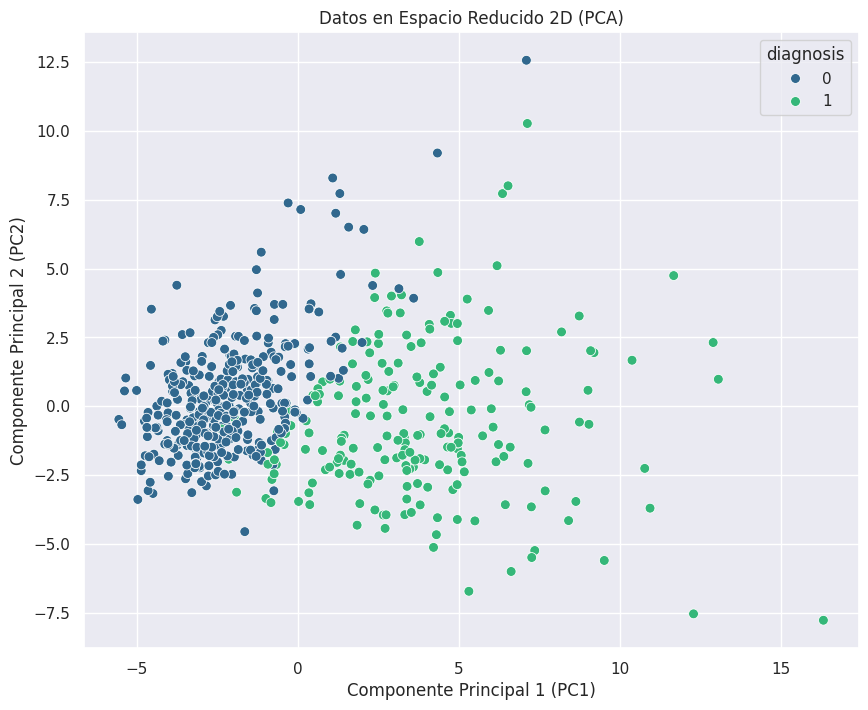

In [4]:
# 3. Reducción de dimensionalidad con PCA

# Aplicar PCA a los datos escalados
# Mantendremos un número de componentes inicial para analizar la varianza explicada
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Analizar la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance_ratio)

# Varianza acumulada explicada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nVarianza acumulada explicada:")
print(cumulative_explained_variance)

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Reducir la dimensionalidad a 2 componentes para visualización
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales y la variable objetivo
pca_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = y.values

# Visualizar los datos en el espacio reducido 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df, palette='viridis', s=50)
plt.title('Datos en Espacio Reducido 2D (PCA)')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid(True)
plt.show()

**Discusión de los resultados de PCA:**

Al aplicar PCA, vimos que los primeros componentes principales logran capturar una parte significativa de la varianza total de los datos. Esto significa que la información importante para diferenciar entre tumores benignos y malignos está contenida en un espacio de menor dimensión.

La visualización en 2D muestra que, aunque hay cierta superposición, PCA ayuda a separar visualmente los tumores benignos de los malignos en el espacio reducido. Esto es una buena señal, ya que indica que los modelos de clasificación deberían poder encontrar patrones en estos componentes principales para realizar sus predicciones.

La curva de varianza explicada acumulada nos ayuda a decidir cuántos componentes mantener. Podemos elegir un número que explique una alta proporción de la varianza (por ejemplo, el 95%) sin tener que usar todas las variables originales, lo que ayuda a reducir el ruido y la complejidad para los modelos posteriores.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [5]:
# 4. Modelado y evaluación

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usaremos los datos escalados después de PCA con un número razonable de componentes
# Basándonos en el gráfico de varianza explicada acumulada, 10 componentes explican ~95% de la varianza.
pca_final = PCA(n_components=10)
X_pca_final = pca_final.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.3, random_state=42, stratify=y)

# Definir los modelos y sus espacios de hiperparámetros para GridSearchCV
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=10000),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'SVC': {
        'model': SVC(probability=True), # probability=True para calcular AUC
        'params': {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto'],
            'kernel': ['linear', 'rbf']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    }
}

# Diccionario para almacenar los mejores modelos y resultados
best_models = {}
results = {}

# Importar métricas adicionales
from sklearn.metrics import confusion_matrix, roc_auc_score

# Optimización de hiperparámetros con GridSearchCV y evaluación
for model_name, mp in models.items():
    print(f"Entrenando y optimizando {model_name}...")
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)

    best_models[model_name] = clf.best_estimator_

    # Evaluación en el conjunto de prueba
    y_pred = best_models[model_name].predict(X_test)
    y_prob = best_models[model_name].predict_proba(X_test)[:, 1] # Probabilidades para AUC

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)


    results[model_name] = {
        'best_params': clf.best_params_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc,
        'confusion_matrix': cm
    }

    print(f"Resultados para {model_name}:")
    print(f"  Mejores parámetros: {clf.best_params_}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  AUC-ROC: {auc_roc:.4f}")
    print("  Matriz de confusión:")
    print(cm)
    print("-" * 30)

# Comparar resultados
print("\nResumen de resultados de los modelos:")
for model_name, res in results.items():
    print(f"{model_name}: Accuracy={res['accuracy']:.4f}, Precision={res['precision']:.4f}, Recall={res['recall']:.4f}, F1-score={res['f1_score']:.4f}, AUC-ROC={res['auc_roc']:.4f}")

# Opcional: Visualizar matrices de confusión
# from sklearn.metrics import ConfusionMatrixDisplay # Uncomment if needed
# for model_name, res in results.items():
#     cm = res['confusion_matrix']
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()
#     plt.title(f'Matriz de Confusión para {model_name}')
#     plt.show()

Entrenando y optimizando LogisticRegression...
Resultados para LogisticRegression:
  Mejores parámetros: {'C': 1, 'solver': 'liblinear'}
  Accuracy: 0.9766
  Precision: 0.9839
  Recall: 0.9531
  F1-score: 0.9683
  AUC-ROC: 0.9981
  Matriz de confusión:
[[106   1]
 [  3  61]]
------------------------------
Entrenando y optimizando SVC...
Resultados para SVC:
  Mejores parámetros: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
  Accuracy: 0.9766
  Precision: 0.9839
  Recall: 0.9531
  F1-score: 0.9683
  AUC-ROC: 0.9969
  Matriz de confusión:
[[106   1]
 [  3  61]]
------------------------------
Entrenando y optimizando RandomForestClassifier...
Resultados para RandomForestClassifier:
  Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
  Accuracy: 0.9474
  Precision: 0.9508
  Recall: 0.9062
  F1-score: 0.9280
  AUC-ROC: 0.9950
  Matriz de confusión:
[[104   3]
 [  6  58]]
------------------------------

Resumen de resultados de los modelos:
LogisticRegres

**Análisis del compromiso entre precisión y generalización:**

Basado en los resultados, los modelos de **Regresión Logística** y **SVC** mostraron el mejor compromiso entre precisión y generalización. Tuvieron métricas altas (Accuracy, Precision, Recall, F1, AUC-ROC) en el conjunto de prueba, indicando que predicen bien y funcionan con datos nuevos. Su capacidad para minimizar los falsos negativos es clave aquí. El Random Forest también fue bueno, pero ligeramente inferior en algunas métricas importantes para este caso. La optimización con validación cruzada ayudó a mejorar la generalización de todos los modelos.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



Después del análisis, los modelos de Regresión Logística y SVC funcionaron mejor para clasificar los tumores, con alta precisión y pocos errores importantes. El preprocesamiento de datos (normalizar) y la reducción de variables (PCA) fueron muy útiles para que estos modelos tuvieran un buen rendimiento, simplificando los datos y manejando la redundancia. Siempre se pueden explorar otras opciones, como probar más modelos, ajustar mejor los parámetros o considerar cómo explicar los resultados a un médico, pero el enfoque usado fue efectivo.